# Mean Shift Demonstration
## What is it.

The MeanShift algorithm is used to detect "blob clusters" from a dataset. It's useful to detect any sample clusters and trends that happen in the dataset given to it.

The usages vary from pattern recognition to computer vision tasks [1]

## References
[1] https://www.sciencedirect.com/science/article/abs/pii/S0020019012002827

In [10]:
import numpy as nump
import matplotlib.pyplot as plt
from itertools import cycle

# Import necessary implementations
from sklearn.cluster import MeanShift, estimate_bandwidth

# We'll use this to generate our sample data, later, we'll use a real-world data-set
from sklearn.datasets import make_blobs

## Sample Data Set-up

In [11]:
# Where our sample data will generate those centers around - The algorithm should find 4 blobs in this case.
blob_centers = [[1, 1], [1, -1], [-1, 1], [-1,-1]]
X, _ = make_blobs(n_samples=20000, centers=blob_centers, cluster_std=0.6)

## Usage of Mean Shift with Sample Data

In [12]:
# Sets the estimated region to search through - Can be set manually, but in our case we're going to estimate it.
est_band = estimate_bandwidth(X, quantile=0.2, n_samples=1500)

result_ms = MeanShift(bandwidth=est_band, bin_seeding=True)
result_ms.fit(X)

labels = result_ms.labels_
unique = nump.unique(labels)
## Get the centers
centers = result_ms.cluster_centers_

centers_amt = len(centers)

print("Detected clusters: %d" % centers_amt )

Detected clusters: 4


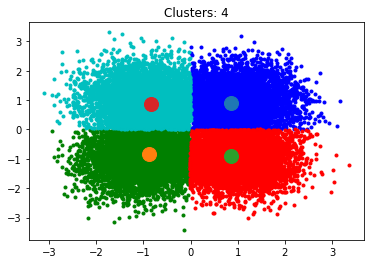

In [13]:
# begins a new figure
plt.figure(1)
# clear it
plt.clf()

# this will keep cycling colors, we'll use this to associate a color to the center
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

# k, being the index number of the centre, col, being the color associated (through zip) with the centre index
for k, col in zip(range(centers_amt), colors):
    members = labels == k
    cluster_center = centers[k]
    
    # Plot the sample points, the cluster dots.
    plt.plot(X[members, 0], X[members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markersize=14
    )
    plt.title("Clusters: %d" % centers_amt)
plt.show()
             

## Usage of Mean Shift with real-world data

With this dataset we'll locate the clusters of Accommodations that have been quality approved in Ireland. We'll be able to see in which cities/parts of the country, there are the most B&Bs.
Whenever they are one-offs, or do the B&B locations tend to cluster together.

In [14]:
import pandas as pd

dataset = pd.read_csv("./data_1.csv")
dataset.head() # Take a look at the sample data.

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Bramble Rock,http://www.bramblerock.com,+353(0)40445075,-6.291733,53.009756,Wicklow,Glendalough,Republic of Ireland,B&B
1,The Davenport,http://www.instagram.com/thedavenportdublin/,+353(0)16073500,-6.250031,53.341665,Dublin,Dublin City,Republic of Ireland,"Hotel,Covid Safety Charter"
2,Townsend House,http://www.townsendhouse-guesthouse.com,+353(0)579121276,-7.909500,53.098816,Offaly,Birr,Republic of Ireland,"Guesthouse,Covid Safety Charter"
3,River's Edge,http://www.riversedge.ie,353670000000,-9.783882,52.106485,Kerry,Killorglin,Ireland,"B&B,B&B Ireland"
4,Amber Springs Hotel & Health Spa,https://www.ambersprings.ie/,+353(0)539484000,-6.290339,52.668124,Wexford,Gorey,Republic of Ireland,"Hotel,Covid Safety Charter,Stay and Spend"


In [15]:
# We're not interested in anything else, so let's just limit out data to Longitude and Latitude 
dataset = dataset[["Longitude", "Latitude"]]

BoundingBox = ((dataset.Longitude.min(), dataset.Longitude.max(), dataset.Latitude.min(), dataset.Latitude.max()))
BoundingBox

(-10.5145311896667, -5.998079892, 51.435022754966, 55.361922)

<AxesSubplot:title={'center':'Accomodation in Ireland'}>

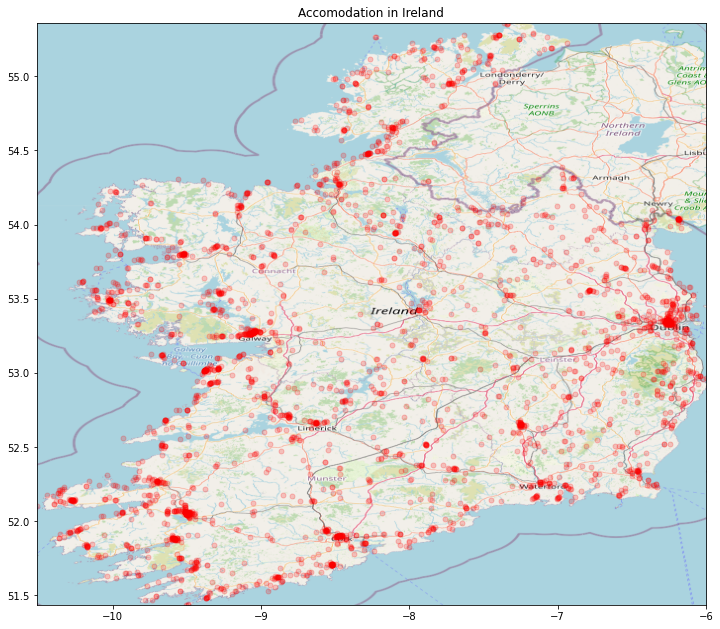

In [16]:
MapImage = plt.imread("./ireland.png")

figure, axes = plt.subplots(figsize= (12,12))

axes.clear()
axes.scatter(dataset.Longitude, dataset.Latitude, zorder=1, alpha=0.2, c="r", s=25)

axes.set_title("Accomodation in Ireland")
axes.set_xlim(BoundingBox[0], BoundingBox[1])
axes.set_ylim(BoundingBox[2], BoundingBox[3])
axes.imshow(MapImage, zorder=0, extent = BoundingBox, aspect = "equal")
axes

In [46]:
# Estimate bandwidth
est_band = estimate_bandwidth(dataset, quantile=0.1, n_samples=30)

result = MeanShift(bandwidth=est_band, bin_seeding=True)
result.fit(dataset)

labels = result.labels_
unique = nump.unique(labels)
centers = result.cluster_centers_

amt_centers = len(centers)

print("Detected centers: %d" % amt_centers)

Detected centers: 15


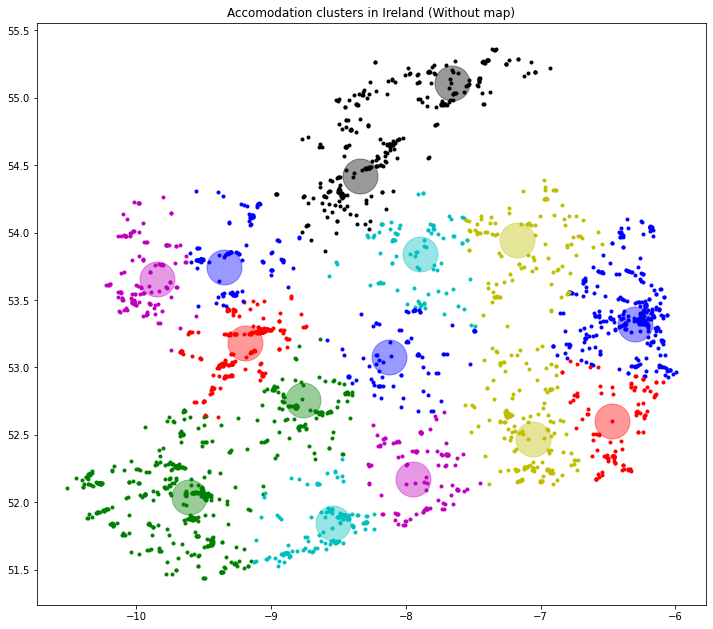

In [47]:
axes.clear()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for center, col in zip(range(amt_centers), colors):
    cluster_center = centers[center]
    members = labels == center
    
    axes.plot(dataset[members].Longitude, dataset[members].Latitude, col + ".")
    
    axes.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        alpha=0.4,
        markersize=35,
        color = col
    )

axes.set_title("Accomodation clusters in Ireland (Without map)")
figure


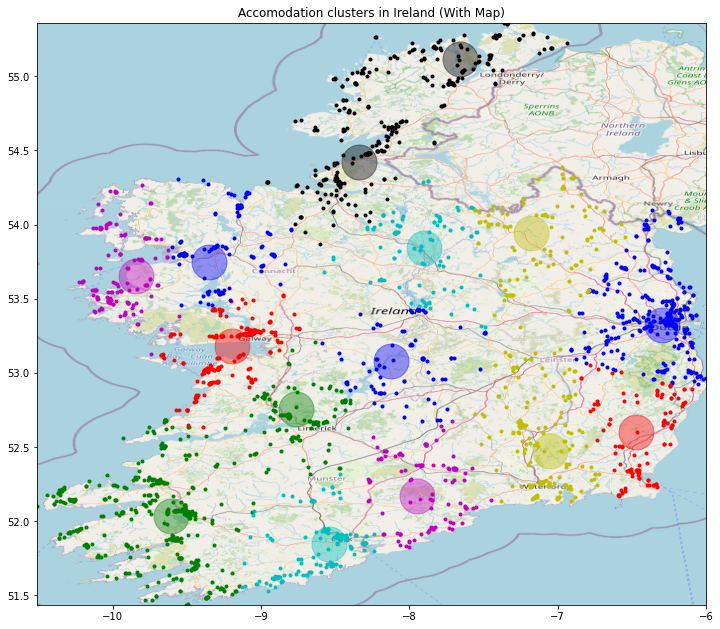

In [49]:
axes.imshow(MapImage, zorder=0, extent = BoundingBox, aspect = "equal")
axes.set_title("Accomodation clusters in Ireland (With Map)")
figure
